In [1]:
import numpy as np
import xarray as xr

import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt

import altair as alt
alt.data_transformers.enable('json')

from sublimpy import utils
from sublimpy import tidy
from sublimpy import extrautils
import glob

In [2]:
file_list = glob.glob("/Users/elischwat/Development/data/sublimationofsnow/sosqc_fast/*.nc")
file_list = [ f for f in file_list if '_20221221_' in f or '_20221222_' in f]
# file_list = [ f for f in file_list if '_20230101_' in f]
# file_list = [ f for f in file_list if '_20230110_' in f or '_20230111_' in f]
file_list = sorted(file_list)

In [3]:
ds = xr.open_mfdataset(file_list, concat_dim="time", combine="nested")

In [4]:
ds = ds[[
    'base_time',
    
    'diagbits_10m_c',	'irgadiag_10m_c',	'ldiag_10m_c',
    'diagbits_10m_d',	'irgadiag_10m_d',	'ldiag_10m_d',
    'diagbits_10m_ue',	'irgadiag_10m_ue',	'ldiag_10m_ue',
    'diagbits_10m_uw',	'irgadiag_10m_uw',	'ldiag_10m_uw',
    'diagbits_15m_c',	'irgadiag_15m_c',	'ldiag_15m_c',
    # 'diagbits_1m_c',	'irgadiag_1m_c',	'ldiag_1m_c',
    # 'diagbits_1m_d',	'irgadiag_1m_d',	'ldiag_1m_d',
    # 'diagbits_1m_ue',	'irgadiag_1m_ue',	'ldiag_1m_ue',
    # 'diagbits_1m_uw',	'irgadiag_1m_uw',	'ldiag_1m_uw',
    'diagbits_20m_c',	'irgadiag_20m_c',	'ldiag_20m_c',
    'diagbits_2m_c',	'irgadiag_2m_c',	'ldiag_2m_c',
    'diagbits_3m_c',	'irgadiag_3m_c',	'ldiag_3m_c',
    'diagbits_3m_d',	'irgadiag_3m_d',	'ldiag_3m_d',
    'diagbits_3m_ue',	'irgadiag_3m_ue',	'ldiag_3m_ue',
    'diagbits_3m_uw',	'irgadiag_3m_uw',	'ldiag_3m_uw',
    'diagbits_5m_c',	'irgadiag_5m_c',	'ldiag_5m_c',

    # 'u_1m_c',	'v_1m_c',	'w_1m_c',	'h2o_1m_c',		'tc_1m_c',
    # 'u_1m_d',	'v_1m_d',	'w_1m_d',	'h2o_1m_d',		'tc_1m_d',
    # 'u_1m_ue',	'v_1m_ue',	'w_1m_ue',	'h2o_1m_ue',	'tc_1m_ue',
    # 'u_1m_uw',	'v_1m_uw',	'w_1m_uw',	'h2o_1m_uw',	'tc_1m_uw',
    'u_2m_c',	'v_2m_c',	'w_2m_c',	'h2o_2m_c',		'tc_2m_c',
    'u_3m_c',	'v_3m_c',	'w_3m_c',	'h2o_3m_c',		'tc_3m_c',
    'u_3m_d',	'v_3m_d',	'w_3m_d',	'h2o_3m_d',		'tc_3m_d',
    'u_3m_ue',	'v_3m_ue',	'w_3m_ue',	'h2o_3m_ue',	'tc_3m_ue',
    'u_3m_uw',	'v_3m_uw',	'w_3m_uw',	'h2o_3m_uw',	'tc_3m_uw',
    'u_5m_c',	'v_5m_c',	'w_5m_c',	'h2o_5m_c',		'tc_5m_c',
    'u_10m_c',	'v_10m_c',	'w_10m_c',	'h2o_10m_c',	'tc_10m_c',
    'u_10m_d',	'v_10m_d',	'w_10m_d',	'h2o_10m_d',	'tc_10m_d',
    'u_10m_ue',	'v_10m_ue',	'w_10m_ue',	'h2o_10m_ue',	'tc_10m_ue',
    'u_10m_uw',	'v_10m_uw',	'w_10m_uw',	'h2o_10m_uw',	'tc_10m_uw',
    'u_15m_c',	'v_15m_c',	'w_15m_c',	'h2o_15m_c',	'tc_15m_c',
    'u_20m_c',	'v_20m_c',	'w_20m_c',	'h2o_20m_c',	'tc_20m_c',
]]

# Create timestamp
To use the datam, its necessary to combine 3 columns of data from the dataset to get the full timestamp. This is demonstrated below. The 'time' column actually only incudes the second and minute information. For all datapoints, the hour according to the 'time' column is 1.  The 'base_time' column indicates the hour of the day. The 'sample' column indicates the 20hz sample number. 

We demonstrate this in the plots below

In [5]:
df1 = pd.DataFrame({'time': np.unique(ds['time'])})
df2 = pd.DataFrame({'base_time': np.unique(ds['base_time'])})
df3 = pd.DataFrame({'sample': np.unique(ds['sample'])})
(
    alt.Chart(df3).mark_tick(thickness=5).encode(
        alt.X("sample:Q").title(
            f'sample (n = {len(df3)})'
        )
    ).properties(width=600) & 

    alt.Chart(df1).mark_tick(thickness=1).encode(
        alt.X("time:T").axis(
            format='%H%M%p'
        ).title(
            f'time (n = {len(df1)})'
        )
    ).properties(width=600) & 

    alt.Chart(df2).mark_tick(thickness=5).encode(
        alt.X("base_time:T").title(
            f'base_time (n = {len(df2)})'
        )
    ).properties(width=600)
)

alt.VConcatChart(...)

In [6]:
df = ds.to_dataframe().reset_index()

In [7]:
import swifter

In [8]:
df['time'] = df.swifter.apply(lambda row: dt.datetime(
        year = row['time'].year,
        month = row['time'].month,
        day = row['time'].day,
        hour = row['base_time'].hour,
        minute = row['time'].minute,
        second = row['time'].second,
        microsecond = int(row['sample'] * (1e6/20))
    ),
    axis = 1
)

Dask Apply:   0%|          | 0/23 [00:00<?, ?it/s]

In [9]:
df = utils.modify_df_timezone(df, 'UTC', "US/Mountain")
ds = df.set_index('time').to_xarray()

In [10]:
(ds[['irgadiag_10m_c']].to_dataframe()['irgadiag_10m_c'] > 0).groupby(pd.Grouper(freq='5Min')).count().max()

6000

In [11]:
df['irgadiag_10m_c'].unique()

array([0.00000e+00,         nan, 6.55370e+04, 1.00000e+00, 5.24289e+05,
       7.86433e+05, 2.62145e+05, 1.96609e+05, 1.31073e+05], dtype=float32)

In [12]:
df['irgadiag_15m_c'].unique()

array([0.0000e+00,        nan, 6.5537e+04, 1.0000e+00], dtype=float32)

In [13]:
df['irgadiag_20m_c'].unique()

array([0.00000e+00,         nan, 2.62145e+05, 1.00000e+00, 1.31073e+05,
       6.55370e+04], dtype=float32)

In [14]:
df.set_index('time')['irgadiag_10m_c'].values

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

# Examine measurements and diagnostics

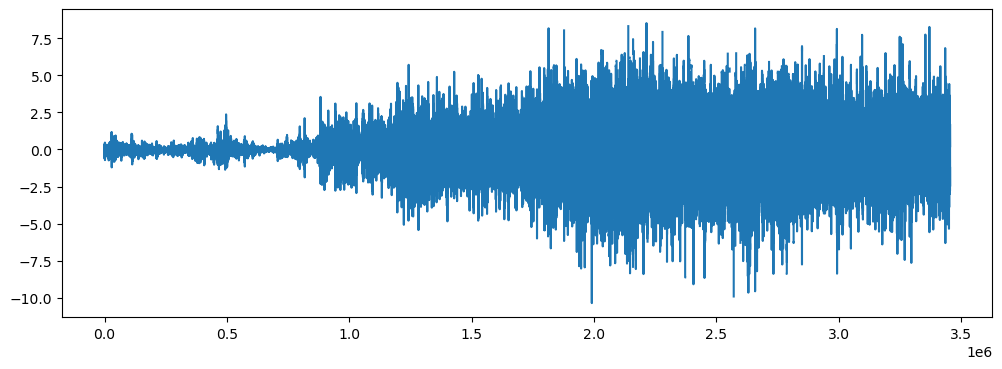

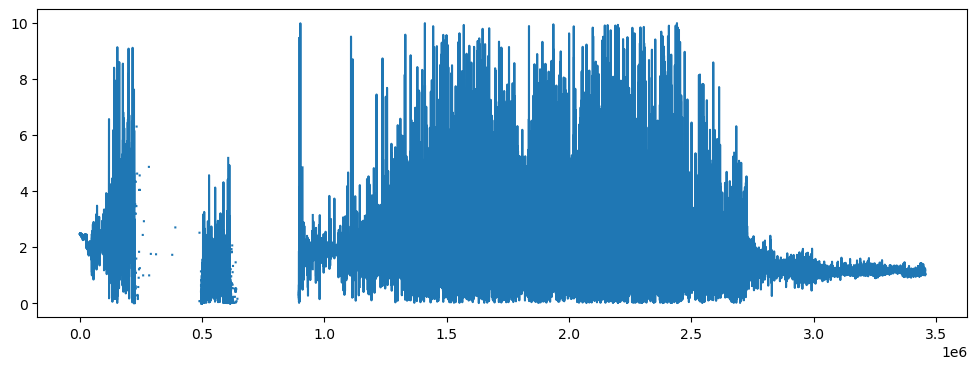

In [15]:
df['w_10m_c'].plot(figsize=(12,4))
plt.show()
df['h2o_10m_c'].plot(figsize=(12,4))
plt.show()

In [16]:
def create_re_avg_ds(ds, re_avg_period_seconds, var1 = 'w_3m_c', var2='h2o_3m_c', covariance_name = 'w_h2o__3m_c', moment4th_name = 'w_h2o_w_h2o__3m_c'):
    coarse_ds = ds.coarsen(time=re_avg_period_seconds).mean()
    coarse_ds = coarse_ds.assign_coords(time = coarse_ds.time.dt.round('1s'))
    coarse_ds = coarse_ds.reindex_like(ds, method='nearest')
    ds[f"{var1}_mean"] = coarse_ds[f"{var1}"]
    ds[f"{var1}_fluc"] = ds[f"{var1}"] - ds[f"{var1}_mean"]
    ds[f"{var2}_mean"] = coarse_ds[f"{var2}"]
    ds[f"{var2}_fluc"] = ds[f"{var2}"] - ds[f"{var2}_mean"]
    ds[covariance_name] = ds[f"{var2}_fluc"] * ds[f"{var1}_fluc"]
    ds[moment4th_name] = ds[f"{var2}_fluc"] * ds[f"{var1}_fluc"] * ds[f"{var2}_fluc"] * ds[f"{var1}_fluc"]
    ds = ds.coarsen(time = re_avg_period_seconds).mean()
    ds = ds.assign_coords(time = ds.time.dt.round('1s'))
    return ds

In [17]:
import pandas as pd

In [18]:
df = df.set_index('time')

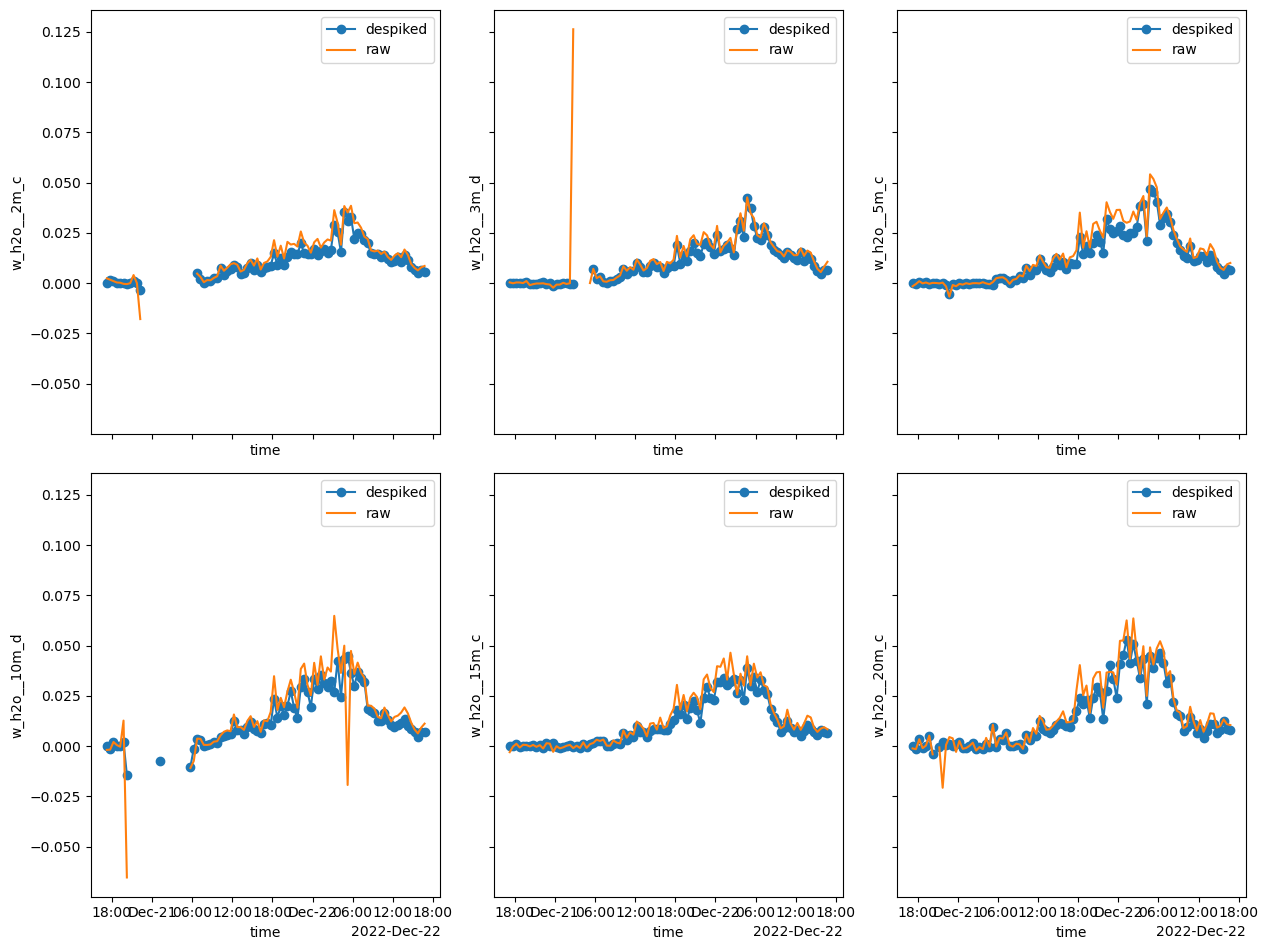

In [19]:
# processing using diagostic flags and despiking using MAD, block operations
def block_median(timeseries, window):
    return timeseries.groupby(pd.Grouper(freq=window)).transform('median')
def filter_spike(timeseries, q = 3.5, window='30min'):
    mad = block_median( np.abs(timeseries - block_median(timeseries, window=window)), window=window)
    upper_bound = block_median(timeseries, window=window) + q*mad / 0.6745
    lower_bound = block_median(timeseries, window=window) - q*mad / 0.6745
    is_valid = (timeseries > lower_bound) & (timeseries < upper_bound)
    return timeseries.where(is_valid)

df_2m_c = pd.DataFrame(
        filter_spike(df['h2o_2m_c'].where(df['irgadiag_2m_c'] == 0))
    ).join(
        filter_spike(df['w_2m_c'].where(df['ldiag_2m_c'] == 0))
    )

df_3m_d = pd.DataFrame(
        filter_spike(df['h2o_3m_d'].where(df['irgadiag_3m_d'] == 0))
    ).join(
        filter_spike(df['w_3m_d'].where(df['ldiag_3m_d'] == 0))
    )

df_5m_c = pd.DataFrame(
        filter_spike(df['h2o_5m_c'].where(df['irgadiag_5m_c'] == 0))
    ).join(
        filter_spike(df['w_5m_c'].where(df['ldiag_5m_c'] == 0))
    )

df_10m_d = pd.DataFrame(
        filter_spike(df['h2o_10m_d'].where(df['irgadiag_10m_d'] == 0))
    ).join(
        filter_spike(df['w_10m_d'].where(df['ldiag_10m_d'] == 0))
    )

df_15m_c = pd.DataFrame(
        filter_spike(df['h2o_15m_c'].where(df['irgadiag_15m_c'] == 0))
    ).join(
        filter_spike(df['w_15m_c'].where(df['ldiag_15m_c'] == 0))
    )

df_20m_c = pd.DataFrame(
        filter_spike(df['h2o_20m_c'].where(df['irgadiag_20m_c'] == 0))
    ).join(
        filter_spike(df['w_20m_c'].where(df['ldiag_20m_c'] == 0))
    )

fig, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize=[2*6.4, 2*4.8])
create_re_avg_ds(df_2m_c.to_xarray(), 20*60*30, 'w_2m_c', 'h2o_2m_c', 'w_h2o__2m_c', 'w_h2o_w_h2o__2m_c')['w_h2o__2m_c'].plot(marker='o', label='despiked', ax=axes[0,0])
create_re_avg_ds(df.to_xarray(), 20*60*30, 'w_2m_c', 'h2o_2m_c', 'w_h2o__2m_c', 'w_h2o_w_h2o__2m_c')['w_h2o__2m_c'].plot(label='raw', ax=axes[0,0])

create_re_avg_ds(df_3m_d.to_xarray(), 20*60*30, 'w_3m_d', 'h2o_3m_d', 'w_h2o__3m_d', 'w_h2o_w_h2o__3m_d')['w_h2o__3m_d'].plot(marker='o', label='despiked', ax=axes[0,1])
create_re_avg_ds(df.to_xarray(), 20*60*30, 'w_3m_d', 'h2o_3m_d', 'w_h2o__3m_d', 'w_h2o_w_h2o__3m_d')['w_h2o__3m_d'].plot(label='raw', ax=axes[0,1])

create_re_avg_ds(df_5m_c.to_xarray(), 20*60*30, 'w_5m_c', 'h2o_5m_c', 'w_h2o__5m_c', 'w_h2o_w_h2o__5m_c')['w_h2o__5m_c'].plot(marker='o', label='despiked', ax=axes[0,2])
create_re_avg_ds(df.to_xarray(), 20*60*30, 'w_5m_c', 'h2o_5m_c', 'w_h2o__5m_c', 'w_h2o_w_h2o__5m_c')['w_h2o__5m_c'].plot(label='raw', ax=axes[0,2])

create_re_avg_ds(df_10m_d.to_xarray(), 20*60*30, 'w_10m_d', 'h2o_10m_d', 'w_h2o__10m_d', 'w_h2o_w_h2o__10m_d')['w_h2o__10m_d'].plot(marker='o', label='despiked', ax=axes[1,0])
create_re_avg_ds(df.to_xarray(), 20*60*30, 'w_10m_d', 'h2o_10m_d', 'w_h2o__10m_d', 'w_h2o_w_h2o__10m_d')['w_h2o__10m_d'].plot(label='raw', ax=axes[1,0])

create_re_avg_ds(df_15m_c.to_xarray(), 20*60*30, 'w_15m_c', 'h2o_15m_c', 'w_h2o__15m_c', 'w_h2o_w_h2o__15m_c')['w_h2o__15m_c'].plot(marker='o', label='despiked', ax=axes[1,1])
create_re_avg_ds(df.to_xarray(), 20*60*30, 'w_15m_c', 'h2o_15m_c', 'w_h2o__15m_c', 'w_h2o_w_h2o__15m_c')['w_h2o__15m_c'].plot(label='raw', ax=axes[1,1])

create_re_avg_ds(df_20m_c.to_xarray(), 20*60*30, 'w_20m_c', 'h2o_20m_c', 'w_h2o__20m_c', 'w_h2o_w_h2o__20m_c')['w_h2o__20m_c'].plot(marker='o', label='despiked', ax=axes[1,2])
create_re_avg_ds(df.to_xarray(), 20*60*30, 'w_20m_c', 'h2o_20m_c', 'w_h2o__20m_c', 'w_h2o_w_h2o__20m_c')['w_h2o__20m_c'].plot(label='raw', ax=axes[1,2])

for ax in axes.flatten():
    ax.legend()
plt.tight_layout()

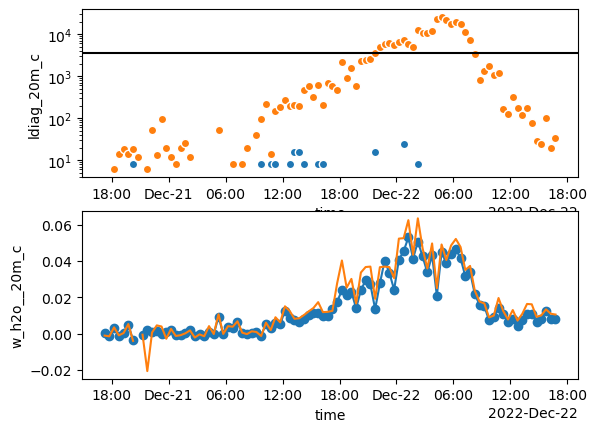

In [20]:
fig, axes = plt.subplots(2,1)
xr.DataArray((df['irgadiag_20m_c'] > 0).astype('int')).coarsen(time = 20*60*30).sum().plot.scatter(ax=axes[0])
xr.DataArray((df['ldiag_20m_c'] > 0).astype('int')).coarsen(time = 20*60*30).sum().plot.scatter(ax=axes[0])
axes[0].set_yscale('log')
axes[0].axhline(3600, color='black')
create_re_avg_ds(df_20m_c.to_xarray(), 20*60*30, 'w_20m_c', 'h2o_20m_c', 'w_h2o__20m_c', 'w_h2o_w_h2o__20m_c')['w_h2o__20m_c'].plot(marker='o', label='despiked', ax=axes[1])
create_re_avg_ds(df.to_xarray(), 20*60*30, 'w_20m_c', 'h2o_20m_c', 'w_h2o__20m_c', 'w_h2o_w_h2o__20m_c')['w_h2o__20m_c'].plot(label='raw', ax=axes[1])
# axes[1].set_ylim(-0.5, 0.5)

# How much does bad data matter? fill gaps with maximum

In [21]:
# First we remove data with flags and filter out spikes
src = pd.DataFrame(
        filter_spike(df['h2o_10m_c'].where(df['irgadiag_10m_c'] == 0))
    ).join(
        filter_spike(df['w_10m_c'].where(df['ldiag_10m_c'] == 0))
    )

src = src[['w_10m_c', 'h2o_10m_c']].reset_index()

src[['time', 'h2o_10m_c']]

src['h2o_10m_c - 30min max'] = src.groupby(src.index // 36000)['h2o_10m_c'].transform('max')
src['w_10m_c - 30min max'] = src.groupby(src.index // 36000)['w_10m_c'].transform('max')
src['h2o_10m_c filled'] = src['h2o_10m_c'].fillna(src['h2o_10m_c - 30min max'])
src['w_10m_c filled'] = src['w_10m_c'].fillna(src['w_10m_c - 30min max'])
src = src.set_index('time')

In [22]:
src.mean()

w_10m_c                 -0.061695
h2o_10m_c                1.801723
h2o_10m_c - 30min max    2.210036
w_10m_c - 30min max      2.217655
h2o_10m_c filled         1.892115
w_10m_c filled           0.193192
dtype: float32

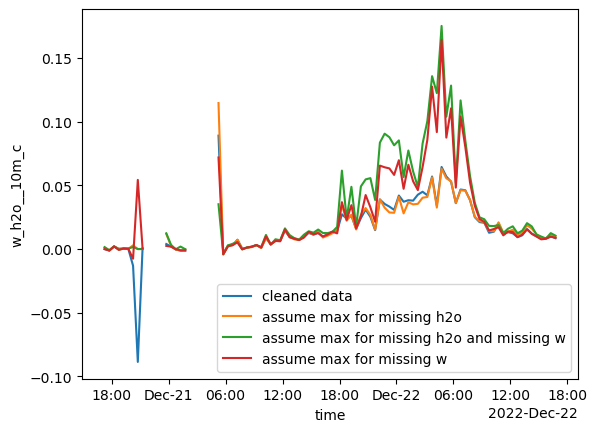

In [23]:
create_re_avg_ds(
    src.to_xarray(), 
    20*60*30, 
    'w_10m_c', 
    'h2o_10m_c', 
    'w_h2o__10m_c', 
    'w_h2o_w_h2o__10m_c'
)['w_h2o__10m_c'].plot(label='cleaned data')
create_re_avg_ds(
    src.to_xarray(), 
    20*60*30, 
    'w_10m_c', 
    'h2o_10m_c filled', 
    'w_h2o__10m_c', 
    'w_h2o_w_h2o__10m_c'
)['w_h2o__10m_c'].plot(label='assume max for missing h2o')
create_re_avg_ds(
    src.to_xarray(), 
    20*60*30, 
    'w_10m_c filled', 
    'h2o_10m_c filled', 
    'w_h2o__10m_c', 
    'w_h2o_w_h2o__10m_c'
)['w_h2o__10m_c'].plot(label='assume max for missing h2o and missing w')
create_re_avg_ds(
    src.to_xarray(), 
    20*60*30, 
    'w_10m_c filled', 
    'h2o_10m_c', 
    'w_h2o__10m_c', 
    'w_h2o_w_h2o__10m_c'
)['w_h2o__10m_c'].plot(label='assume max for missing w')
plt.legend()

# Calculate fluxes and flux uncertainty (4th moments) (implement Reynolds averaging)

Uncertainty calculations are following Stiperski and Rotach, 2016

In [ ]:
ds_avg = create_re_avg_ds(ds, 20*60*5, 'w_3m_c', 'h2o_3m_c', 'w_h2o__3m_c', 'w_h2o_w_h2o__3m_c')

In [ ]:
wind_speed = np.sqrt(ds_avg['u_3m_c']**2 + ds_avg['v_3m_c']**2)
z = 3
uncertainty = np.sqrt(
    (z / (60*5*wind_speed))*((ds_avg['w_h2o_w_h2o__3m_c'] / ds_avg['w_h2o__3m_c']**2) - 1)
)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ds_avg['time'], ds_avg['w_h2o__3m_c'], 'k-')
# plt.plot(ds_avg['time'], uncertainty, 'k-')
plt.fill_between(ds_avg['time'], ds_avg['w_h2o__3m_c'] - uncertainty, ds_avg['w_h2o__3m_c'] + uncertainty)
# plt.ylim(0,1)
plt.show()

In [ ]:
tidy_df = pd.read_parquet("tidy_df_20221130_20230509_noplanar_fit.parquet")
tidy_df = tidy_df[tidy_df.variable.isin(['SF_avg_1m_ue', 'SF_avg_2m_ue','diags_3m_c'])].pivot(index='time', columns='variable', values='value')
tidy_df['SF_avg_ue'] = tidy_df[['SF_avg_1m_ue', 'SF_avg_2m_ue']].mean(axis=1)
tidy_df = tidy_df['SF_avg_ue'].loc["20221222 07":"20221222 19"]
tidy_df = utils.modify_df_timezone(tidy_df.reset_index(), pytz.UTC, "US/Mountain").set_index('time')

In [ ]:
tidy_df['SF_avg_ue'].plot(figsize=(8,2))
plt.ylabel("Blowing snow flux\n(g/m^2/s)")

In [ ]:
ds_avg['ldiag_3m_c'].to_dataframe()['ldiag_3m_c'].plot(figsize=(8,2))
plt.ylabel("Anemometer flag\nFraction of time w/ flags")

In [ ]:
ds_avg['irgadiag_3m_c'].to_dataframe()['irgadiag_3m_c'].plot(figsize=(8,2))
plt.ylabel("Irgason flag")

In [ ]:
plt.plot(ds_avg.to_dataframe()['w_h2o__3m_c'])
ds_avg['w_h2o__3m_c'].to_dataframe()['w_h2o__3m_c'].plot(figsize=(8,2))
plt.ylabel("H_l (g/m^2/s)")